In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={"figure.figsize":(9,6)})

In [3]:
events_data=pd.read_csv("https://stepik.org/media/attachments/course/4852/event_data_train.zip")

In [4]:
submissions_data=pd.read_csv("https://stepik.org/media/attachments/course/4852/submissions_data_train.zip")

In [150]:
events_data["date"]=pd.to_datetime(events_data.timestamp,unit="s")

In [151]:
events_data

,step_id,timestamp,action,user_id,date,dat,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
...,...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19,11677_1526772685
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750


In [7]:
events_data["dat"]=events_data.date.dt.date

<AxesSubplot:xlabel='dat'>

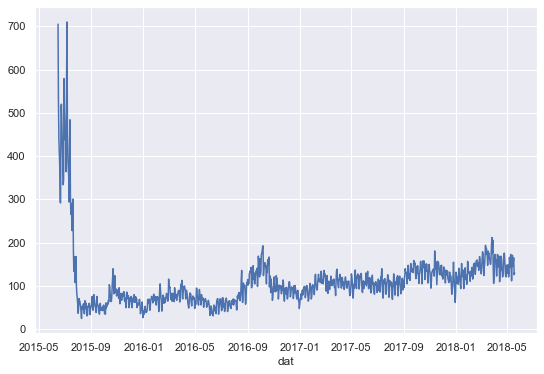

In [8]:
events_data.groupby("dat").user_id.nunique().plot()

<AxesSubplot:>

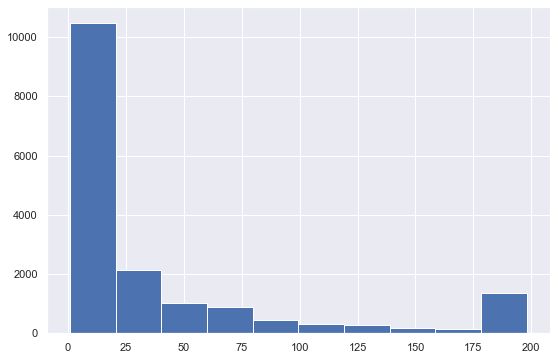

In [9]:
events_data[events_data.action=="passed"].groupby("user_id", as_index=False).agg({"step_id":"count"}).step_id.hist()

In [10]:
events_data.pivot_table(index="user_id",columns="action",values="step_id",aggfunc="count",fill_value=0).reset_index().discovered

0         1
1         9
2        91
3        11
4         1
         ..
19229     8
19230     1
19231    69
19232    10
19233    12
Name: discovered, Length: 19234, dtype: int64

In [11]:
submissions_data["date"]=pd.to_datetime(submissions_data.timestamp,unit="s")

In [12]:
submissions_data["day"]=submissions_data.date.dt.date

In [13]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [14]:
users_scores=submissions_data.pivot_table(index="user_id",columns="submission_status",values="step_id",aggfunc="count",fill_value=0).reset_index()

In [15]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [16]:
gap=events_data[["user_id","dat","timestamp"]].drop_duplicates(subset=["user_id","dat"]).groupby("user_id")["timestamp"].apply(list).apply(np.diff).values

In [17]:
gap=np.concatenate(gap,axis=0)

In [18]:
gap

array([4843602, 6899249,  182484, ...,   98252,   57019, 1567990])

In [19]:
gap=gap/(24*60*60)

In [20]:
gap=pd.Series(gap)

<AxesSubplot:>

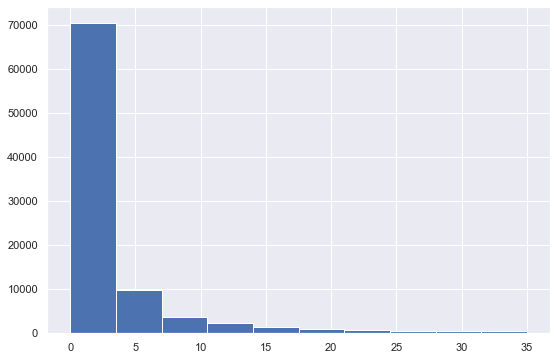

In [21]:
gap[gap<35].hist()

In [22]:
gap.quantile(0.95)

59.760440972222156

In [23]:
events_data.user_id.unique()

array([17632, 12494,   442, ..., 22851,   943,  5198], dtype=int64)

In [24]:
events_data.groupby("user_id").agg({"step_id":"count"}).max()

step_id    33043
dtype: int64

In [25]:
a=events_data.loc[(events_data.step_id==158433)]

In [26]:
events_data.tail()

,step_id,timestamp,action,user_id,date,dat
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [27]:
users=events_data.groupby("user_id",as_index=False).agg({"timestamp":'max'})

In [28]:
users["drop"]=1526772811-users.timestamp

In [29]:
users

,user_id,timestamp,drop
0,1,1472827464,53945347
1,2,1519226966,7545845
2,3,1444581588,82191223
3,5,1499859939,26912872
4,7,1521634660,5138151
...,...,...,...
19229,26790,1517495987,9276824
19230,26793,1510225034,16547777
19231,26794,1512035039,14737772
19232,26797,1509995096,16777715


In [30]:
dropout=30*24*60*60

In [31]:
now=1526772811

In [32]:
users["drop"]=(now-users.timestamp)>dropout

In [33]:
users

,user_id,timestamp,drop
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [34]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [35]:
users=users.merge(users_scores,on="user_id",how='outer').fillna(0)

In [36]:
users

,user_id,timestamp,drop,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [37]:
users_events=events_data.pivot_table(index="user_id",columns="action",values="step_id",aggfunc="count",fill_value=0).reset_index()

In [38]:
users_events

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [39]:
users=users.merge(users_events,how="outer")

In [40]:
users

,user_id,timestamp,drop,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,0.0,0.0,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [41]:
users_days=events_data.groupby("user_id").dat.nunique().to_frame().reset_index()

In [42]:
users_days

,user_id,dat
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [43]:
users=users.merge(users_days,how="outer")

In [44]:
users

,user_id,timestamp,drop,correct,wrong,discovered,passed,started_attempt,viewed,dat
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [105]:
users["passed_course"]=users.passed>40

In [106]:
users

,user_id,timestamp,drop,correct,wrong,discovered,passed,started_attempt,viewed,dat,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,True,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660
...,...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False,1451484016
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False,1510225031
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,True,1495287049
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False,1508425316


In [107]:
user_min_time=events_data.groupby('user_id').agg({'timestamp':'min'}).rename({'timestamp':'min_timestamp'},axis=1).reset_index()
user_min_time

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
...,...,...
19229,26790,1451484016
19230,26793,1510225031
19231,26794,1495287049
19232,26797,1508425316


In [108]:
users=users.merge(user_min_time,how='outer')

In [109]:
event_data_train=pd.DataFrame()

In [110]:
events_data['user_time']=events_data.user_id.map(str)+"_"+events_data.timestamp.map(str)

In [111]:
time_thr=2*24*60*60

In [112]:
user_time_thr=user_min_time.user_id.map(str)+'_'+(user_min_time.min_timestamp+time_thr).map(str)

In [113]:
user_min_time['user_time_thr']=user_time_thr

In [114]:
user_min_time

,user_id,min_timestamp,user_time_thr
0,1,1472827464,1_1473000264
1,2,1514383364,2_1514556164
2,3,1434358476,3_1434531276
3,5,1466156809,5_1466329609
4,7,1521634660,7_1521807460
...,...,...,...
19229,26790,1451484016,26790_1451656816
19230,26793,1510225031,26793_1510397831
19231,26794,1495287049,26794_1495459849
19232,26797,1508425316,26797_1508598116


In [115]:
events_data_train=events_data[events_data.groupby('user_id')['timestamp'].apply(lambda x:x<=(x.min()+2*24*60*60))]

In [116]:
events_data_train

,step_id,timestamp,action,user_id,date,dat,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
...,...,...,...,...,...,...,...
3480530,32953,1526766998,viewed,24555,2018-05-19 21:56:38,2018-05-19,24555_1526766998
3480531,32953,1526766998,discovered,24555,2018-05-19 21:56:38,2018-05-19,24555_1526766998
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750


In [117]:
submission_data_train=submissions_data[events_data.groupby('user_id')['timestamp'].apply(lambda x:x<=(x.min()+2*24*60*60))]

C:\Users\User\AppData\Local\Temp/ipykernel_5952/3554789225.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  submission_data_train=submissions_data[events_data.groupby('user_id')['timestamp'].apply(lambda x:x<=(x.min()+2*24*60*60))]


In [118]:
from sklearn import tree 

In [119]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [120]:
X=submission_data_train.groupby('user_id').day.nunique().to_frame().reset_index().rename({'day':'days'},axis=1)
X

,user_id,days
0,3,4
1,16,10
2,22,4
3,26,1
4,30,12
...,...,...
5442,26779,8
5443,26781,11
5444,26784,4
5445,26786,7


In [121]:
steps_tried=submission_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index().rename({'step_id':"steps_tried"})

In [122]:
X=X.merge(steps_tried,on='user_id',how='outer')

In [123]:
X

,user_id,days,step_id
0,3,4,10
1,16,10,37
2,22,4,6
3,26,1,2
4,30,12,17
...,...,...,...
5442,26779,8,10
5443,26781,11,15
5444,26784,4,4
5445,26786,7,10


In [124]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [125]:
X=X.merge(submission_data_train.pivot_table(index='user_id',columns='submission_status',values='step_id',aggfunc='count',fill_value=0).reset_index())

In [126]:
X

,user_id,days,step_id,correct,wrong
0,3,4,10,7,10
1,16,10,37,29,29
2,22,4,6,5,5
3,26,1,2,0,4
4,30,12,17,16,17
...,...,...,...,...,...
5442,26779,8,10,7,13
5443,26781,11,15,11,12
5444,26784,4,4,3,3
5445,26786,7,10,6,11


In [127]:
X['correct_rate']=X.correct/(X.correct+X.wrong)

In [128]:
X

,user_id,days,step_id,correct,wrong,correct_rate
0,3,4,10,7,10,0.411765
1,16,10,37,29,29,0.500000
2,22,4,6,5,5,0.500000
3,26,1,2,0,4,0.000000
4,30,12,17,16,17,0.484848
...,...,...,...,...,...,...
5442,26779,8,10,7,13,0.350000
5443,26781,11,15,11,12,0.478261
5444,26784,4,4,3,3,0.500000
5445,26786,7,10,6,11,0.352941


In [129]:
X=X.merge(events_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',fill_value=0).reset_index()[['user_id','viewed']],how='outer')

In [130]:
X=X.fillna(0)

In [131]:
X=X.merge(users[['user_id','passed_course','drop']],how='outer')

In [132]:
users

,user_id,timestamp,drop,correct,wrong,discovered,passed,started_attempt,viewed,dat,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,True,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660
...,...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False,1451484016
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False,1510225031
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,True,1495287049
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False,1508425316


In [133]:
X=X.rename({"drop":'gone'},axis=1)

In [134]:
X=X[~((X.gone==False) & (X.passed_course==False))]

In [135]:
X

,user_id,days,step_id,correct,wrong,correct_rate,viewed,passed_course,gone
0,3,4.0,10.0,7.0,10.0,0.411765,192,True,True
1,16,10.0,37.0,29.0,29.0,0.500000,651,True,True
2,22,4.0,6.0,5.0,5.0,0.500000,492,True,True
3,26,1.0,2.0,0.0,4.0,0.000000,32,False,True
4,30,12.0,17.0,16.0,17.0,0.484848,512,True,True
...,...,...,...,...,...,...,...,...,...
19229,26789,0.0,0.0,0.0,0.0,0.000000,2,False,True
19230,26790,0.0,0.0,0.0,0.0,0.000000,9,False,True
19231,26793,0.0,0.0,0.0,0.0,0.000000,1,False,True
19232,26797,0.0,0.0,0.0,0.0,0.000000,13,False,True


In [136]:
y=X.passed_course

In [137]:
X=X.drop(['passed_course','gone'],axis=1)

In [138]:
X=X.rename({'day':'days','step_id':'steps_tried'},axis=1)

In [139]:
X

,user_id,days,steps_tried,correct,wrong,correct_rate,viewed
0,3,4.0,10.0,7.0,10.0,0.411765,192
1,16,10.0,37.0,29.0,29.0,0.500000,651
2,22,4.0,6.0,5.0,5.0,0.500000,492
3,26,1.0,2.0,0.0,4.0,0.000000,32
4,30,12.0,17.0,16.0,17.0,0.484848,512
...,...,...,...,...,...,...,...
19229,26789,0.0,0.0,0.0,0.0,0.000000,2
19230,26790,0.0,0.0,0.0,0.0,0.000000,9
19231,26793,0.0,0.0,0.0,0.0,0.000000,1
19232,26797,0.0,0.0,0.0,0.0,0.000000,13


In [140]:
X=X.drop('user_id',axis=1)

In [141]:
y=y.map(int)

In [142]:
y

0        1
1        1
2        1
3        0
4        1
        ..
19229    0
19230    0
19231    0
19232    0
19233    0
Name: passed_course, Length: 18439, dtype: int64

In [143]:
X

,days,steps_tried,correct,wrong,correct_rate,viewed
0,4.0,10.0,7.0,10.0,0.411765,192
1,10.0,37.0,29.0,29.0,0.500000,651
2,4.0,6.0,5.0,5.0,0.500000,492
3,1.0,2.0,0.0,4.0,0.000000,32
4,12.0,17.0,16.0,17.0,0.484848,512
...,...,...,...,...,...,...
19229,0.0,0.0,0.0,0.0,0.000000,2
19230,0.0,0.0,0.0,0.0,0.000000,9
19231,0.0,0.0,0.0,0.0,0.000000,1
19232,0.0,0.0,0.0,0.0,0.000000,13


In [144]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [145]:
ft=RandomForestClassifier(random_state=0)

In [146]:
parametrs={'criterion':['entropy'],'n_estimators':range(10,50,10),'max_depth':range(1,12,2),'min_samples_leaf':range(1,7),'min_samples_split':(2,9,2)}

In [147]:
search=GridSearchCV(ft,parametrs,cv=3,n_jobs=-1)

In [148]:
search.fit(X,y)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': (2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [100]:
submission_data_test=pd.read_csv('https://stepik.org/media/attachments/course/4852/submission_data_test.csv')

In [101]:
events_data_test=pd.read_csv('https://stepik.org/media/attachments/course/4852/events_data_test.csv')

In [102]:
submission_data_test

,step_id,timestamp,submission_status,user_id
0,31971,1526800961,wrong,24370
1,31971,1526800976,wrong,24370
2,31971,1526800993,wrong,24370
3,31971,1526801054,correct,24370
4,31972,1526800664,wrong,24370
...,...,...,...,...
42256,120745,1539247150,correct,448
42257,120745,1540380070,wrong,9418
42258,120745,1543165802,correct,8093
42259,120745,1544465625,wrong,25737


In [103]:
events_data_test

,step_id,timestamp,action,user_id
0,30456,1526893787,viewed,24417
1,30456,1526893797,viewed,24417
2,30456,1526893954,viewed,24417
3,30456,1526895780,viewed,24417
4,30456,1526893787,discovered,24417
...,...,...,...,...
274763,158433,1545846175,discovered,3649
274764,158433,1545846175,passed,3649
274765,158433,1545846283,viewed,20953
274766,158433,1545846283,discovered,20953


In [104]:
X

,days,steps_tried,correct,wrong,correct_rate,viewed
0,4.0,10.0,7.0,10.0,0.411765,192
1,10.0,37.0,29.0,29.0,0.500000,651
2,4.0,6.0,5.0,5.0,0.500000,492
3,1.0,2.0,0.0,4.0,0.000000,32
4,12.0,17.0,16.0,17.0,0.484848,512
...,...,...,...,...,...,...
19229,0.0,0.0,0.0,0.0,0.000000,2
19230,0.0,0.0,0.0,0.0,0.000000,9
19231,0.0,0.0,0.0,0.0,0.000000,1
19232,0.0,0.0,0.0,0.0,0.000000,13


In [152]:
events_data_test["date"]=pd.to_datetime(events_data.timestamp,unit="s")
events_data_test["day"]=events_data.date.dt.date

In [155]:
events_data_test=events_data_test.drop('date',axis=1)

In [159]:
submission_data_test["date"]=pd.to_datetime(events_data.timestamp,unit="s")
submission_data_test["day"]=events_data.date.dt.date
submission_data_test=submission_data_test.drop('date',axis=1)

In [161]:
X_test=pd.DataFrame()

In [163]:
users_events=events_data_test.pivot_table(index="user_id",columns="action",values="step_id",aggfunc="count",fill_value=0).reset_index()

In [164]:
users_events

action,user_id,discovered,passed,started_attempt,viewed
0,4,1,1,0,1
1,6,1,1,0,1
2,10,2,2,0,6
3,12,11,9,4,14
4,13,70,70,35,105
...,...,...,...,...,...
6179,26791,1,1,0,1
6180,26795,1,1,0,1
6181,26796,6,4,2,12
6182,26799,6,6,2,6


In [176]:
cor=submission_data_test[submission_data_test['submission_status']=='correct'].groupby('user_id').agg({'step_id':'nunique'}).reset_index()

In [182]:
cor=cor.rename({'step_id':'n_of_correct'},axis=1)

In [183]:
cor
X_test=

,user_id,n_of_correct
0,12,1
1,13,29
2,15,10
3,21,24
4,35,7
...,...,...
2758,26775,38
2759,26780,16
2760,26785,3
2761,26796,2


In [184]:
X=X.merge(cor[['user_id','n_of_correct']],how='outer')

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [200]:
X_test=pd.DataFrame({'user_id':events_data_test['user_id'].unique()})

In [201]:
X_test=X_test.sort_values(by=['user_id']).reset_index()

In [202]:
X_test=X_test.drop('index',axis=1)

In [203]:
X_test=X_test.merge(cor[['user_id','n_of_correct']],how='outer').fillna(0)

In [205]:
X_test

,user_id,n_of_correct
0,4,0.0
1,6,0.0
2,10,0.0
3,12,1.0
4,13,29.0
...,...,...
6179,26791,0.0
6180,26795,0.0
6181,26796,2.0
6182,26799,2.0


In [208]:
pas=X_test[X_test['n_of_correct']>=40]

In [209]:
pas

,user_id,n_of_correct
1242,5441,40.0
2248,9788,40.0
4476,19487,40.0
4949,21444,40.0
5014,21685,40.0
6086,26412,40.0


In [210]:
X

,days,steps_tried,correct,wrong,correct_rate,viewed
0,4.0,10.0,7.0,10.0,0.411765,192
1,10.0,37.0,29.0,29.0,0.500000,651
2,4.0,6.0,5.0,5.0,0.500000,492
3,1.0,2.0,0.0,4.0,0.000000,32
4,12.0,17.0,16.0,17.0,0.484848,512
...,...,...,...,...,...,...
19229,0.0,0.0,0.0,0.0,0.000000,2
19230,0.0,0.0,0.0,0.0,0.000000,9
19231,0.0,0.0,0.0,0.0,0.000000,1
19232,0.0,0.0,0.0,0.0,0.000000,13
